# Семинар 3. Линейная регрессия

Подключение библиотек. 
$
\newcommand{\R}{\mathbb{R}}
\newcommand{\X}{\mathbb{X}}
\newcommand{\norm}[1]{\lVert #1 \rVert}
\newcommand{\abs}[1]{\left| #1 \right|}
\newcommand{\E}{\mathbb{E}}
\newcommand{\D}{\mathbb{D}}
\renewcommand{\Prob}{\mathbb{P}}
\renewcommand{\le}{\leqslant}
\renewcommand{\ge}{\geqslant}
$

In [92]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as wg

plt.style.use('ggplot')

# 1. Линейная регрессия из библиотеки sklearn

Для демонстрации воспользуемся датасетом __вес-рост__ ([ссылка](https://www.kaggle.com/mustafaali96/weight-height)):
* 10000 наблюдений, 5000 мужчин и 5000 женщин. Признаки:
    * Рост в дюймах.
    * Вес в фунтах.
    * Пол (Male/ Female).

In [68]:
df = pd.read_csv('weight-height.csv')

print('Число наблюдений:', df.shape[0])
df.head()

Число наблюдений: 10000


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


__Задача 1:__ Переведем вес и рост в привычные единицы измерения по формулам:
* 1 фунт = 0.453592 кг.
* 1 дюйм = 2.54 см.

In [69]:
### CODE HERE ###

df['Height'] = df['Height'] * 2.54
df['Weight'] = df['Weight'] * 0.453592

Совместное распределение данных:

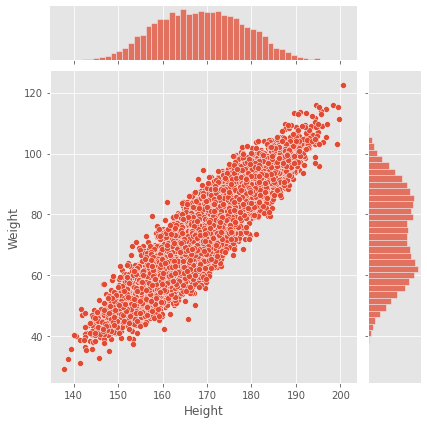

In [70]:
sns.jointplot(data=df, x='Height', y='Weight')
plt.show()

In [71]:
X = df[['Height']].values
y = df['Weight'].values

print('X:', X.shape)
print('y:', y.shape)

X: (10000, 1)
y: (10000,)


## Классическая линейная регрессия

Пусть объект описывается $d$ признаками $(x_1, \ldots, x_d)$ и нужно предсказать ответ $y$.

__Линейная регрессия:__ $$ \hat{y} \sim \theta_0 + \sum\limits_{k=1}^d \theta_k x_k, $$

* $\hat{y}$ -- прогнозное значение.
* $x_k, k=\overline{1,n}$ -- значения признаков объекта.
* $\theta_k, k=\overline{1,n}$ -- параметры модели.

Векторная запись: $$\hat{y} = x^T \theta. $$

__Примечание:__ В этой записи считаем, что $x_0 = 1$.

### Обучение: 
Пусть имеется матрица признаков $X \in \R^{n x d}$ и вектор ответов $Y \in \R^n$. 

__Метод наименьших квадратов:__ $$Q(\theta) = ||Y - X\theta|| = \sum\limits_{k=1}^n (Y_k - X_k^T \theta)^2 \to \min\limits_\theta.$$

Оптимизация:
* Аналитическое решение: $$\hat{\theta} = (X^T X)^{-1} X^T Y.$$
* Итерационные методы: 
    * _градиентный спуск (GD):_ $$\theta^{(k+1)} = \theta^{(k)} - \alpha \cdot \nabla Q(\theta^{(k)}).$$
    * _стохастический градиентный спуск (SGD):_ $$\theta^{(k+1)} = \theta^{(k)} - \alpha \cdot \nabla_i Q(\theta^{(k)}), $$ где градиент берется $\nabla_i$ берется по наблюдению со случайным индексом $i$.
    * _mini-batch стохастический градиентный спуск (Mini-batch SGD)._

In [72]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

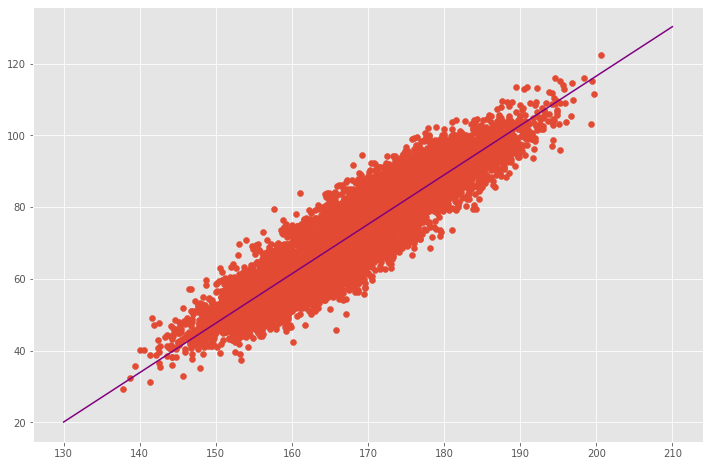

In [73]:
x_plt = np.linspace(130, 210, 1024)

model_pred = model.predict(x_plt.reshape(-1, 1))

plt.figure(figsize=(12, 8))
plt.scatter(data=df, x='Height', y='Weight')
plt.plot(x_plt, model_pred, color='purple', label='LinearRegression')
plt.show()

# 2. Работа с категориальными признаками.

Заметим, что в наших данных имеется категориальный признак _Gender_.

In [74]:
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

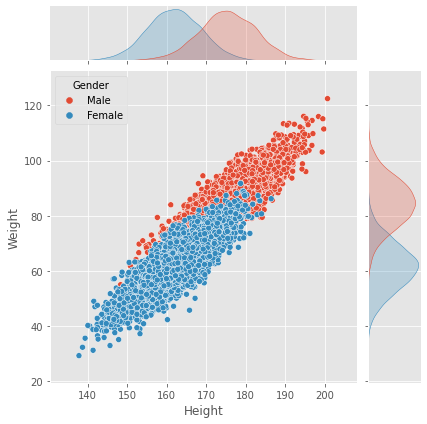

In [75]:
sns.jointplot(data=df, x='Height', y='Weight', hue='Gender')
plt.show()

__Задача:__ Занумеруем и превратим текстовые признаки в числовые значения:

In [76]:
# df['GenderCode'] = ### CODE
df['GenderCode'] = (df.Gender == 'Female').astype(int)
df.head()

,Gender,Height,Weight,GenderCode
0,Male,187.571423,109.720985,0
1,Male,174.706036,73.622732,0
2,Male,188.239668,96.497550,0
3,Male,182.196685,99.809504,0
4,Male,177.499761,93.598619,0


__Задача:__ Обученить линейную модель с двумя признаками.

In [89]:
X = df[['Height', 'GenderCode']].values
y = df['Weight']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

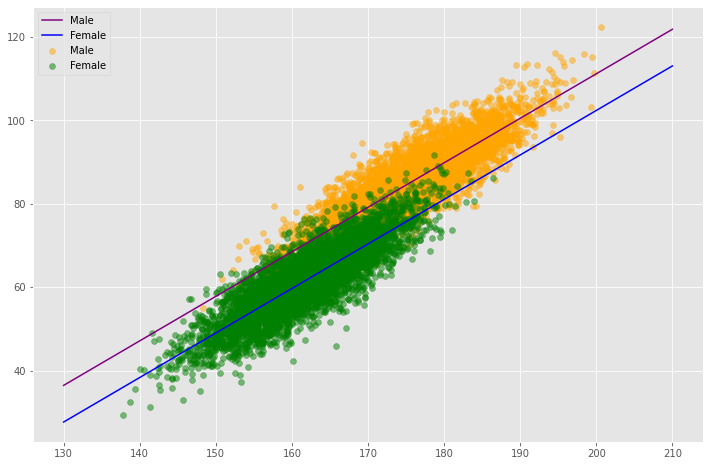

In [88]:
x_plt = np.linspace(130, 210, 1024)

male_pred = model.predict(np.column_stack([x_plt, np.zeros_like(x_plt)]))
female_pred = model.predict(np.column_stack([x_plt, np.ones_like(x_plt)]))

plt.figure(figsize=(12, 8))
plt.scatter(data=df[df.GenderCode==0], x='Height', y='Weight', color='orange', alpha=0.5, label='Male')
plt.scatter(data=df[df.GenderCode==1], x='Height', y='Weight', color='green', alpha=0.5, label='Female')

plt.plot(x_plt, male_pred, color='purple', label='Male')
plt.plot(x_plt, female_pred, color='blue', label='Female')
plt.legend()
plt.show()

### Интерпретация модели

In [96]:
print('Смещение модели:', model.intercept_)
print('Коэффициенты модели:', model.coef_)

Смещение модели: -102.30576688431167
Коэффициенты модели: [ 1.06735934 -8.78957447]


In [97]:
out = wg.Output()

def demo(height, gender):
    gender = 0 if gender == 'Male' else 1
    with out:
        out.clear_output(wait=True)
        pred = model.predict([[height, gender]])
        print('Прогноз Вашего веса при заданных параметрах:', pred)
    return

wg.interact(demo,
    height=wg.FloatSlider(min=120, max=220, value=170, step=1),
    gender=wg.SelectionSlider(options=['Male', 'Female'], value='Male'),
    continuous_update=True
)
display(out)

interactive(children=(FloatSlider(value=170.0, description='height', max=220.0, min=120.0, step=1.0), Selectio…

Output()

# 3. Нелинейная линейная регрессия

Как добавить нелинейности в линейную модель?

In [126]:
def func(x):
    return np.sin(x)

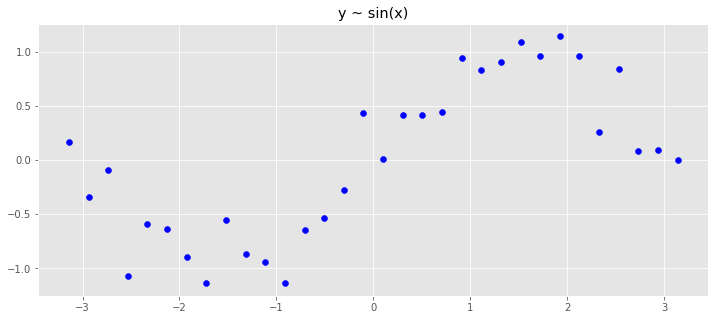

In [127]:
N = 32

X = np.linspace(-np.pi, np.pi, N)
y = func(X) + np.random.normal(0, 0.2, size=N)

plt.figure(0, figsize=(12, 5))
plt.scatter(X, y, color='blue')
plt.title('y ~ sin(x)')
plt.show()

__Полиномиальная регрессия:__ $$ y \sim \theta_0 + \sum\limits_{k=1}^p \theta_k x^k.$$

__Задача:__ По входному вектору $x$ выдать матрицу, где в столбцах стоят степени $x$: $$ x \to (x, x^2, \ldots, x^p).$$

In [132]:
def polynom(x):
    return ### CODE

def polynom(x, p):
    return np.column_stack([x ** k for k in range(1, p+1)])

In [159]:
P = 5

Xp = polynom(X, P)
Xp[:5]

array([[  -3.14159265,    9.8696044 ,  -31.00627668,   97.40909103,
        -306.01968479],
       [  -2.93890926,    8.63718762,  -25.38391064,   74.60100996,
        -219.24559871],
       [  -2.73622586,    7.48693195,  -20.48593682,   56.05415009,
        -153.37681502],
       [  -2.53354246,    6.41883741,  -16.26239714,   41.20147369,
        -104.38568312],
       [  -2.33085907,    5.43290398,  -12.6633335 ,   29.51644569,
         -68.79867503]])

### Работа с числовыми признаками

Преобразования числовых признаков:
* нормализация: $$\tilde{x}_k = \frac{x_k - \E x_k}{\sqrt{\D x_k}}.$$
* минмакс-преобразование: $$\tilde{x}_k = \frac{x_k - \min{x_k}}{\max{x_k} - \min{x_k}}.$$

In [160]:
print('Mean:', Xp.mean(axis=0))
print('Std:', Xp.std(axis=0))

Mean: [2.77555756e-17 3.50211769e+00 1.11022302e-16 2.20479172e+01
 5.32907052e-15]
Std: [  1.87139458   3.12779297  12.84633826  29.27752571 107.17754948]


In [161]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(Xp)
print('Scaler.mean:', scaler.mean_)
print('Scaler.scale:', scaler.scale_)

Scaler.mean: [2.77555756e-17 3.50211769e+00 1.11022302e-16 2.20479172e+01
 5.32907052e-15]
Scaler.scale: [  1.87139458   3.12779297  12.84633826  29.27752571 107.17754948]


In [162]:
Xpm = scaler.transform(Xp)

print('Mean:', Xpm.mean(axis=0))
print('Std:', Xpm.std(axis=0))

Mean: [ 1.38777878e-16  2.77555756e-17 -2.77555756e-17 -1.11022302e-16
 -5.55111512e-17]
Std: [1. 1. 1. 1. 1.]


## Пример: полиномиальная регрессия

In [164]:
model = LinearRegression()
model.fit(Xpm, y)

LinearRegression()

In [168]:
x_new = np.linspace(-np.pi, np.pi, 1024)

X_new = polynom(x_new, P)
X_new = scaler.transform(X_new)
y_new = model.predict(X_new)

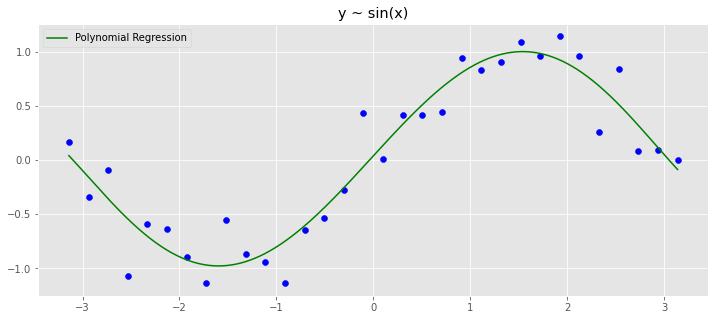

In [169]:
plt.figure(0, figsize=(12, 5))
plt.scatter(X, y, color='blue')
plt.plot(x_new, y_new, color='green', label='Polynomial Regression')
plt.legend()
plt.title('y ~ sin(x)')
plt.show()

# Демонстрация переобучения

In [177]:
N = 32

X = np.linspace(-np.pi, np.pi, N)
y = func(X) + np.random.normal(0, 0.2, size=N)

In [178]:
out = wg.Output()

def demo(p, fix_ylim):
    Xp = polynom(X, p)
    
    # scaler
    scaler = StandardScaler().fit(Xp)    
    Xpm = scaler.transform(Xp)
    
    # model
    model = LinearRegression()
    model.fit(Xpm, y)
    
    # prediction
    x_new = np.linspace(-np.pi, np.pi, 1024)

    X_new = polynom(x_new, p)
    X_new = scaler.transform(X_new)
    y_new = model.predict(X_new)
    
    with out:
        out.clear_output(wait=True)
        plt.figure(0, figsize=(12, 5))
        plt.scatter(X, y, color='blue')
        plt.plot(x_new, y_new, color='green', label=f'p={p}')
        plt.legend()
        plt.title('y ~ sin(x)')
        if fix_ylim:
            plt.ylim(-2, 2)
        plt.show()
    
wg.interact(demo,
    p=wg.IntSlider(min=1, max=X.shape[0], value=1),
    fix_ylim=wg.Checkbox(description='Fix ylim', value=False),
    continuous_update=True
)
display(out)

interactive(children=(IntSlider(value=1, description='p', max=32, min=1), Checkbox(value=False, description='F…

Output()